In [1]:
import re
import json
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import re
import tqdm

%matplotlib inline

In [2]:
df = pd.read_json("neko_dic.json", encoding="utf-8")

In [3]:
df = df.T

In [4]:
df

,surface,base,pos,pos1
0 0,一,一,名詞-数詞,
2 0,吾輩,我が輩,代名詞,
2 1,は,は,助詞-係助詞,
2 2,猫,猫,名詞-普通名詞-一般,
2 3,で,だ,助動詞,助動詞-ダ 連用形-一般
...,...,...,...,...
9960 7,ぬ,ず,助動詞,助動詞-ヌ 終止形-一般
9961 0,南無阿弥陀仏,南無阿弥陀仏,名詞-普通名詞-一般,
9961 1,南無阿弥陀仏,南無阿弥陀仏,名詞-普通名詞-一般,
9962 0,ありがたい,有り難い,形容詞-一般,


In [5]:
hist = df["base"].value_counts()
hist

の              10265
だ               8134
て               7905
は               6514
と               6163
               ...  
取り決める              1
眼下                 1
踉                  1
ゴシック-Gothic        1
俗気                 1
Name: base, Length: 10718, dtype: int64

In [7]:
hist_count = hist.value_counts()
hist_count

1       4598
2       1798
3        903
4        531
5        433
        ... 
539        1
419        1
1623       1
243        1
259        1
Name: base, Length: 233, dtype: int64

In [20]:
hist_sort = sorted(hist_count.items() ,key=lambda x:x)
hist_sort

[(1, 4598),
 (2, 1798),
 (3, 903),
 (4, 531),
 (5, 433),
 (6, 303),
 (7, 237),
 (8, 172),
 (9, 140),
 (10, 118),
 (11, 117),
 (12, 97),
 (13, 90),
 (14, 85),
 (15, 61),
 (16, 67),
 (17, 64),
 (18, 48),
 (19, 37),
 (20, 51),
 (21, 31),
 (22, 27),
 (23, 25),
 (24, 22),
 (25, 31),
 (26, 15),
 (27, 24),
 (28, 19),
 (29, 24),
 (30, 24),
 (31, 15),
 (32, 21),
 (33, 10),
 (34, 12),
 (35, 14),
 (36, 14),
 (37, 7),
 (38, 13),
 (39, 16),
 (40, 15),
 (41, 11),
 (42, 7),
 (43, 7),
 (44, 5),
 (45, 11),
 (46, 6),
 (47, 6),
 (48, 11),
 (49, 7),
 (50, 3),
 (51, 4),
 (52, 7),
 (53, 7),
 (54, 12),
 (55, 7),
 (56, 4),
 (57, 2),
 (58, 4),
 (59, 3),
 (60, 2),
 (61, 3),
 (62, 2),
 (63, 5),
 (64, 2),
 (65, 2),
 (66, 4),
 (67, 1),
 (69, 1),
 (70, 1),
 (71, 2),
 (72, 5),
 (73, 3),
 (74, 2),
 (75, 1),
 (76, 2),
 (78, 4),
 (79, 3),
 (80, 1),
 (81, 2),
 (82, 2),
 (83, 1),
 (84, 2),
 (85, 2),
 (86, 2),
 (88, 4),
 (89, 3),
 (90, 4),
 (91, 2),
 (93, 3),
 (94, 2),
 (95, 1),
 (96, 2),
 (97, 3),
 (98, 2),
 (100, 2),
 (

(array([204.,  10.,   2.,   3.,   3.,   2.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

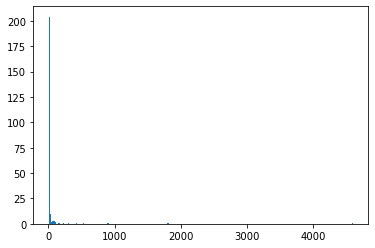

In [37]:
plt.hist(hist_count,len(hist_count))